In [ ]:
# === IMPORT LIBRARIES AND LOAD DATA ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Tambahkan OneHotEncoder untuk encoding baru
from sklearn.model_selection import train_test_split
import pickle  # Untuk menyimpan .pkl
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/train.csv')
print("Dataset berhasil dimuat. Shape:", df.shape)
print("Kolom-kolom:", list(df.columns))



Dataset berhasil dimuat. Shape: (1460, 81)
Kolom-kolom: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# === EDA (EXPLORATORY DATA ANALYSIS) ===
# EDA: Basic overview dan summary
print("\n=== EDA: Basic Overview ===")
print(df.describe())


=== EDA: Basic Overview ===
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407 

In [ ]:
# EDA: Analisis kolom numerik dengan banyak nilai 0 (include PoolArea)
numeric_cols = df.select_dtypes(include=[np.number]).columns
zero_counts = {}
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_counts[col] = {'Zero Count': zero_count, 'Percentage': zero_percentage}
zero_df = pd.DataFrame(zero_counts).T.sort_values(by='Percentage', ascending=False)
print("\nEDA: Kolom Numerik dengan Banyak Nilai 0 (include PoolArea):")
print(zero_df.head(20))  # Top 20 berdasarkan persentase


EDA: Kolom Numerik dengan Banyak Nilai 0 (include PoolArea):
               Zero Count  Percentage
PoolArea           1453.0   99.520548
3SsnPorch          1436.0   98.356164
LowQualFinSF       1434.0   98.219178
MiscVal            1408.0   96.438356
BsmtHalfBath       1378.0   94.383562
ScreenPorch        1344.0   92.054795
BsmtFinSF2         1293.0   88.561644
EnclosedPorch      1252.0   85.753425
HalfBath            913.0   62.534247
MasVnrArea          861.0   58.972603
BsmtFullBath        856.0   58.630137
2ndFlrSF            829.0   56.780822
WoodDeckSF          761.0   52.123288
Fireplaces          690.0   47.260274
OpenPorchSF         656.0   44.931507
BsmtFinSF1          467.0   31.986301
BsmtUnfSF           118.0    8.082192
GarageArea           81.0    5.547945
GarageCars           81.0    5.547945
TotalBsmtSF          37.0    2.534247


In [ ]:
# EDA: Analisis missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percentage})
print("\nEDA: Missing Values Summary:")
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Percentage', ascending=False))


EDA: Missing Values Summary:
              Missing Count  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtQual                 37    2.534247
BsmtCond                 37    2.534247
BsmtFinType1             37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


In [ ]:
# EDA: Analisis duplikasi
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100
print(f"\nEDA: Jumlah duplikasi: {duplicates}, Persentase: {duplicate_percentage:.2f}%")



EDA: Jumlah duplikasi: 0, Persentase: 0.00%


In [ ]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


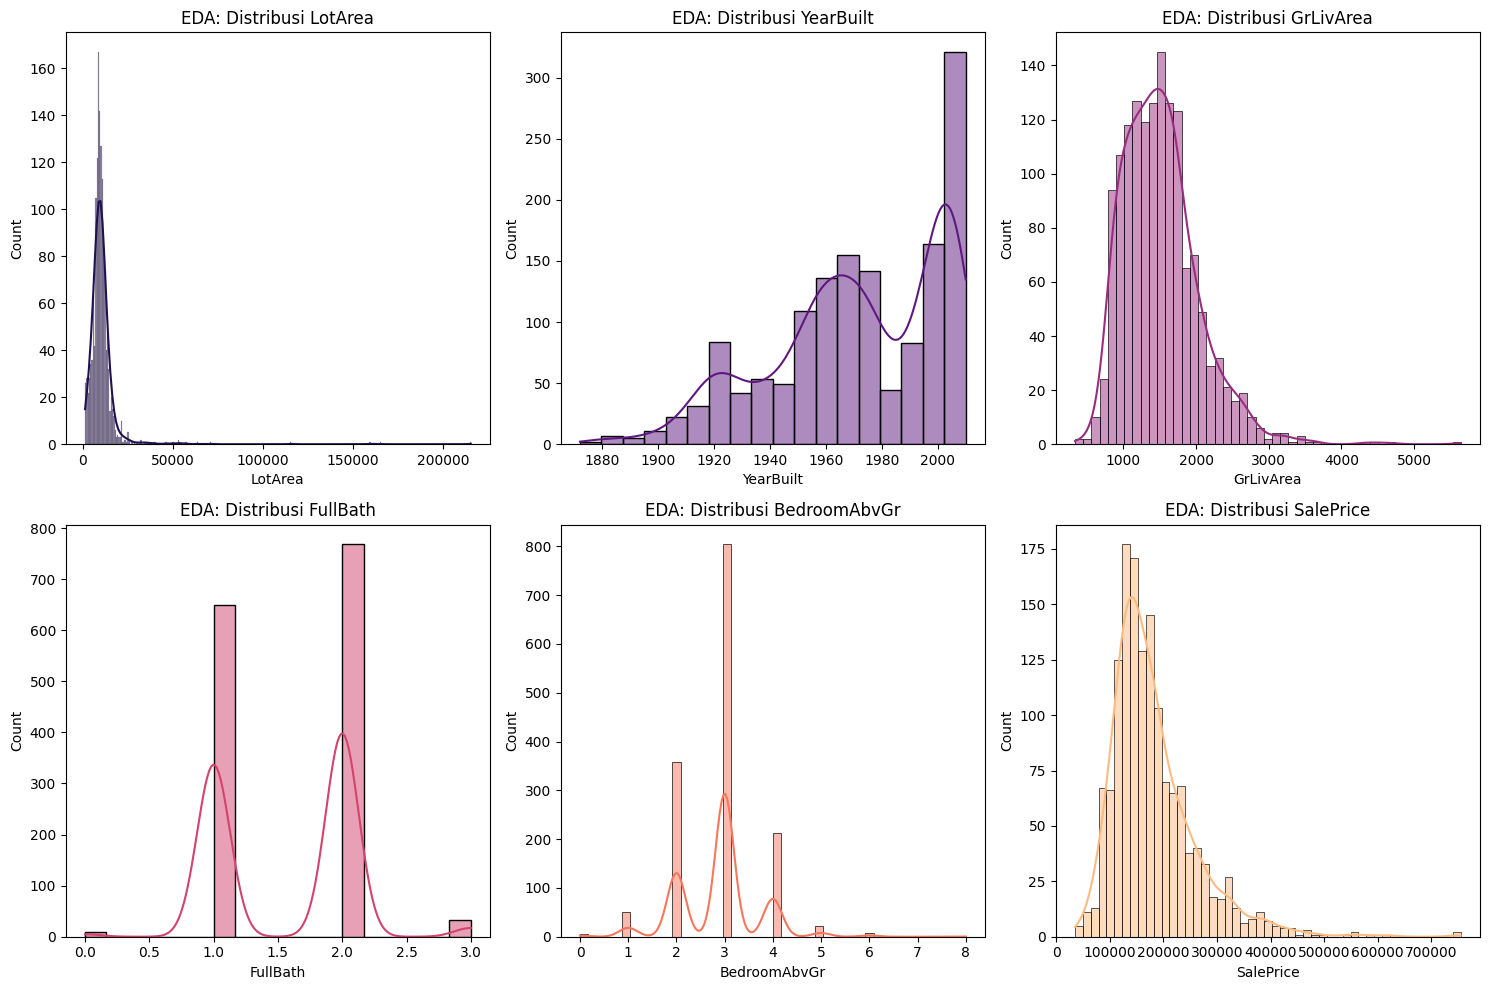

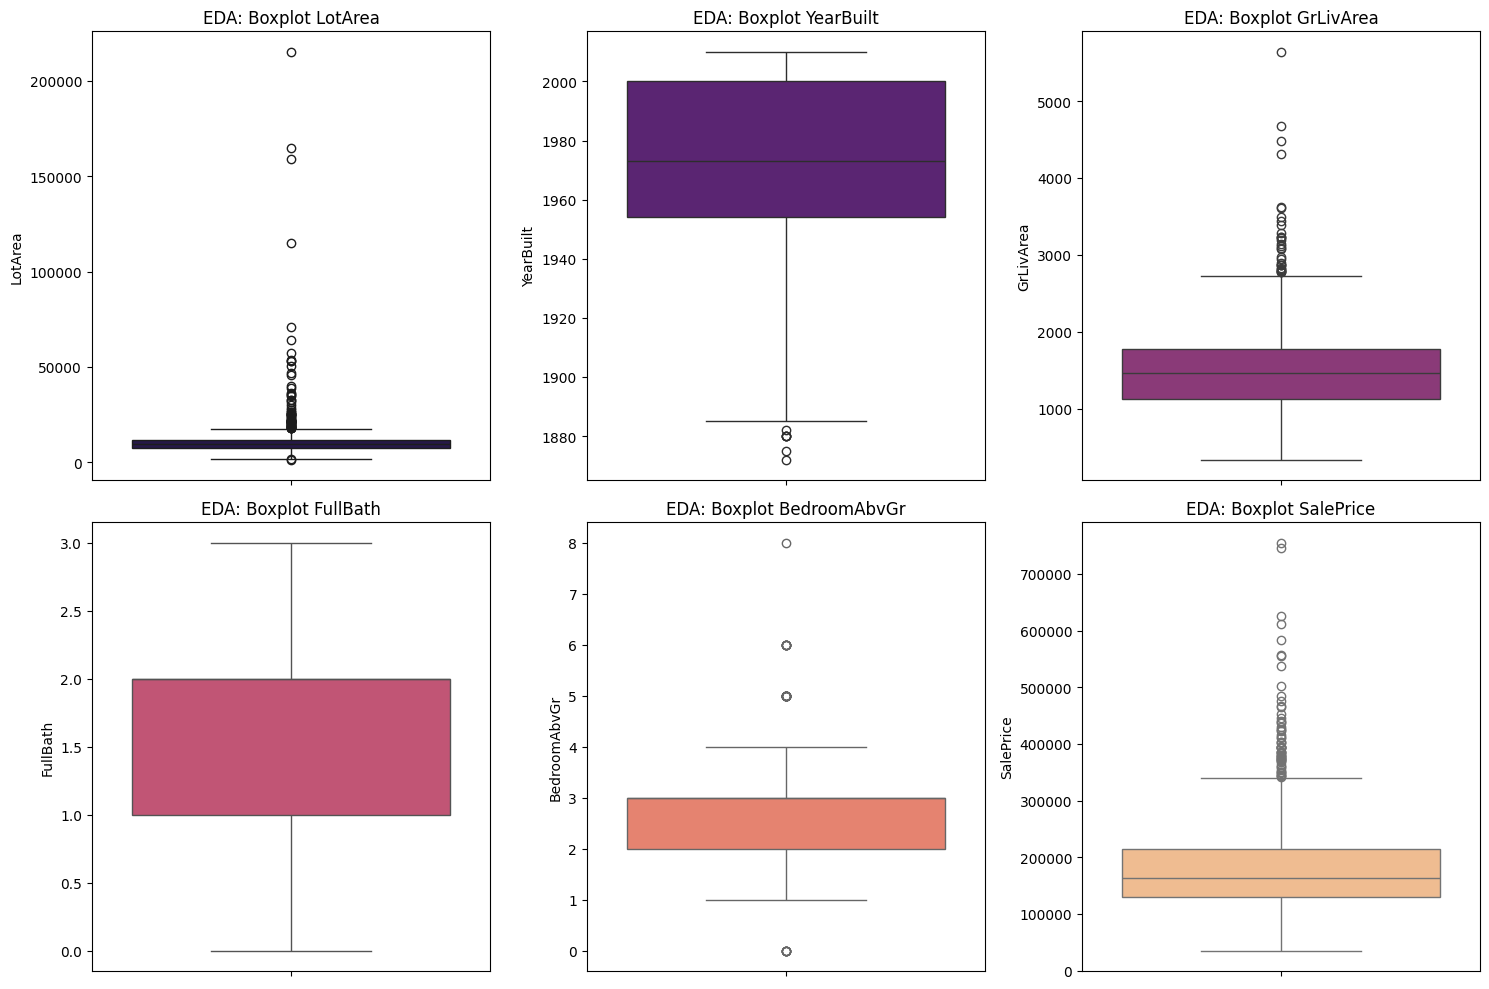

In [ ]:
# EDA: Visualisasi distribusi dan outlier untuk kolom utama
cols_main = ['LotArea', 'YearBuilt', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'SalePrice']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(cols_main):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3], color=sns.color_palette('magma')[i % len(sns.color_palette('magma'))])
    axes[i//3, i%3].set_title(f'EDA: Distribusi {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(cols_main):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3], color=sns.color_palette('magma')[i % len(sns.color_palette('magma'))])
    axes[i//3, i%3].set_title(f'EDA: Boxplot {col}')
plt.tight_layout()
plt.show()

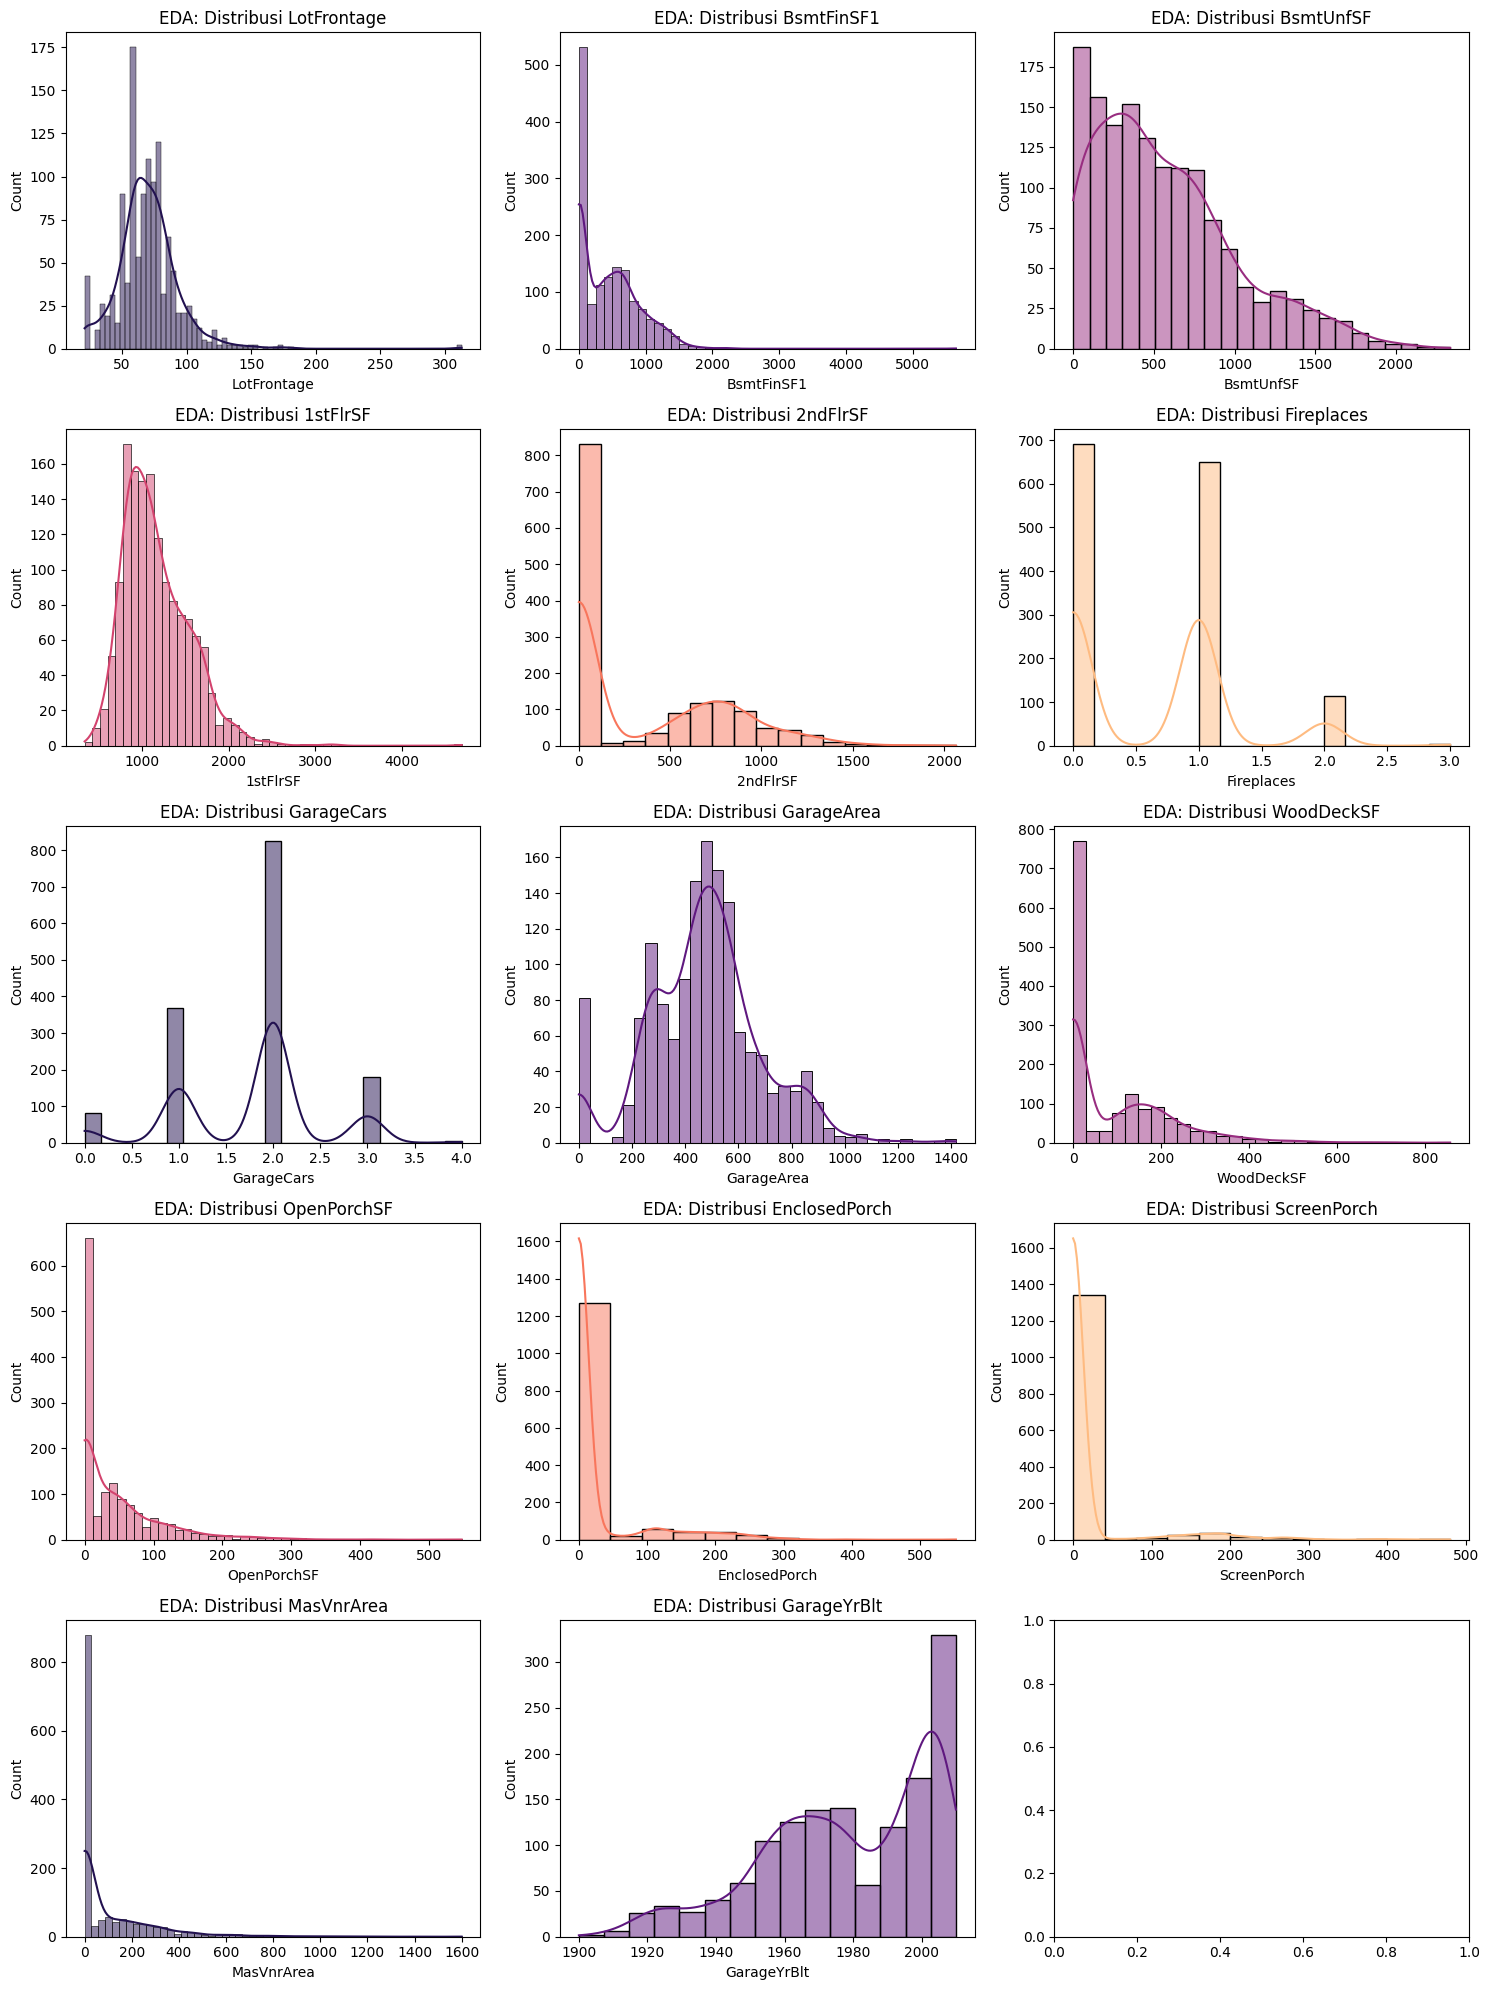

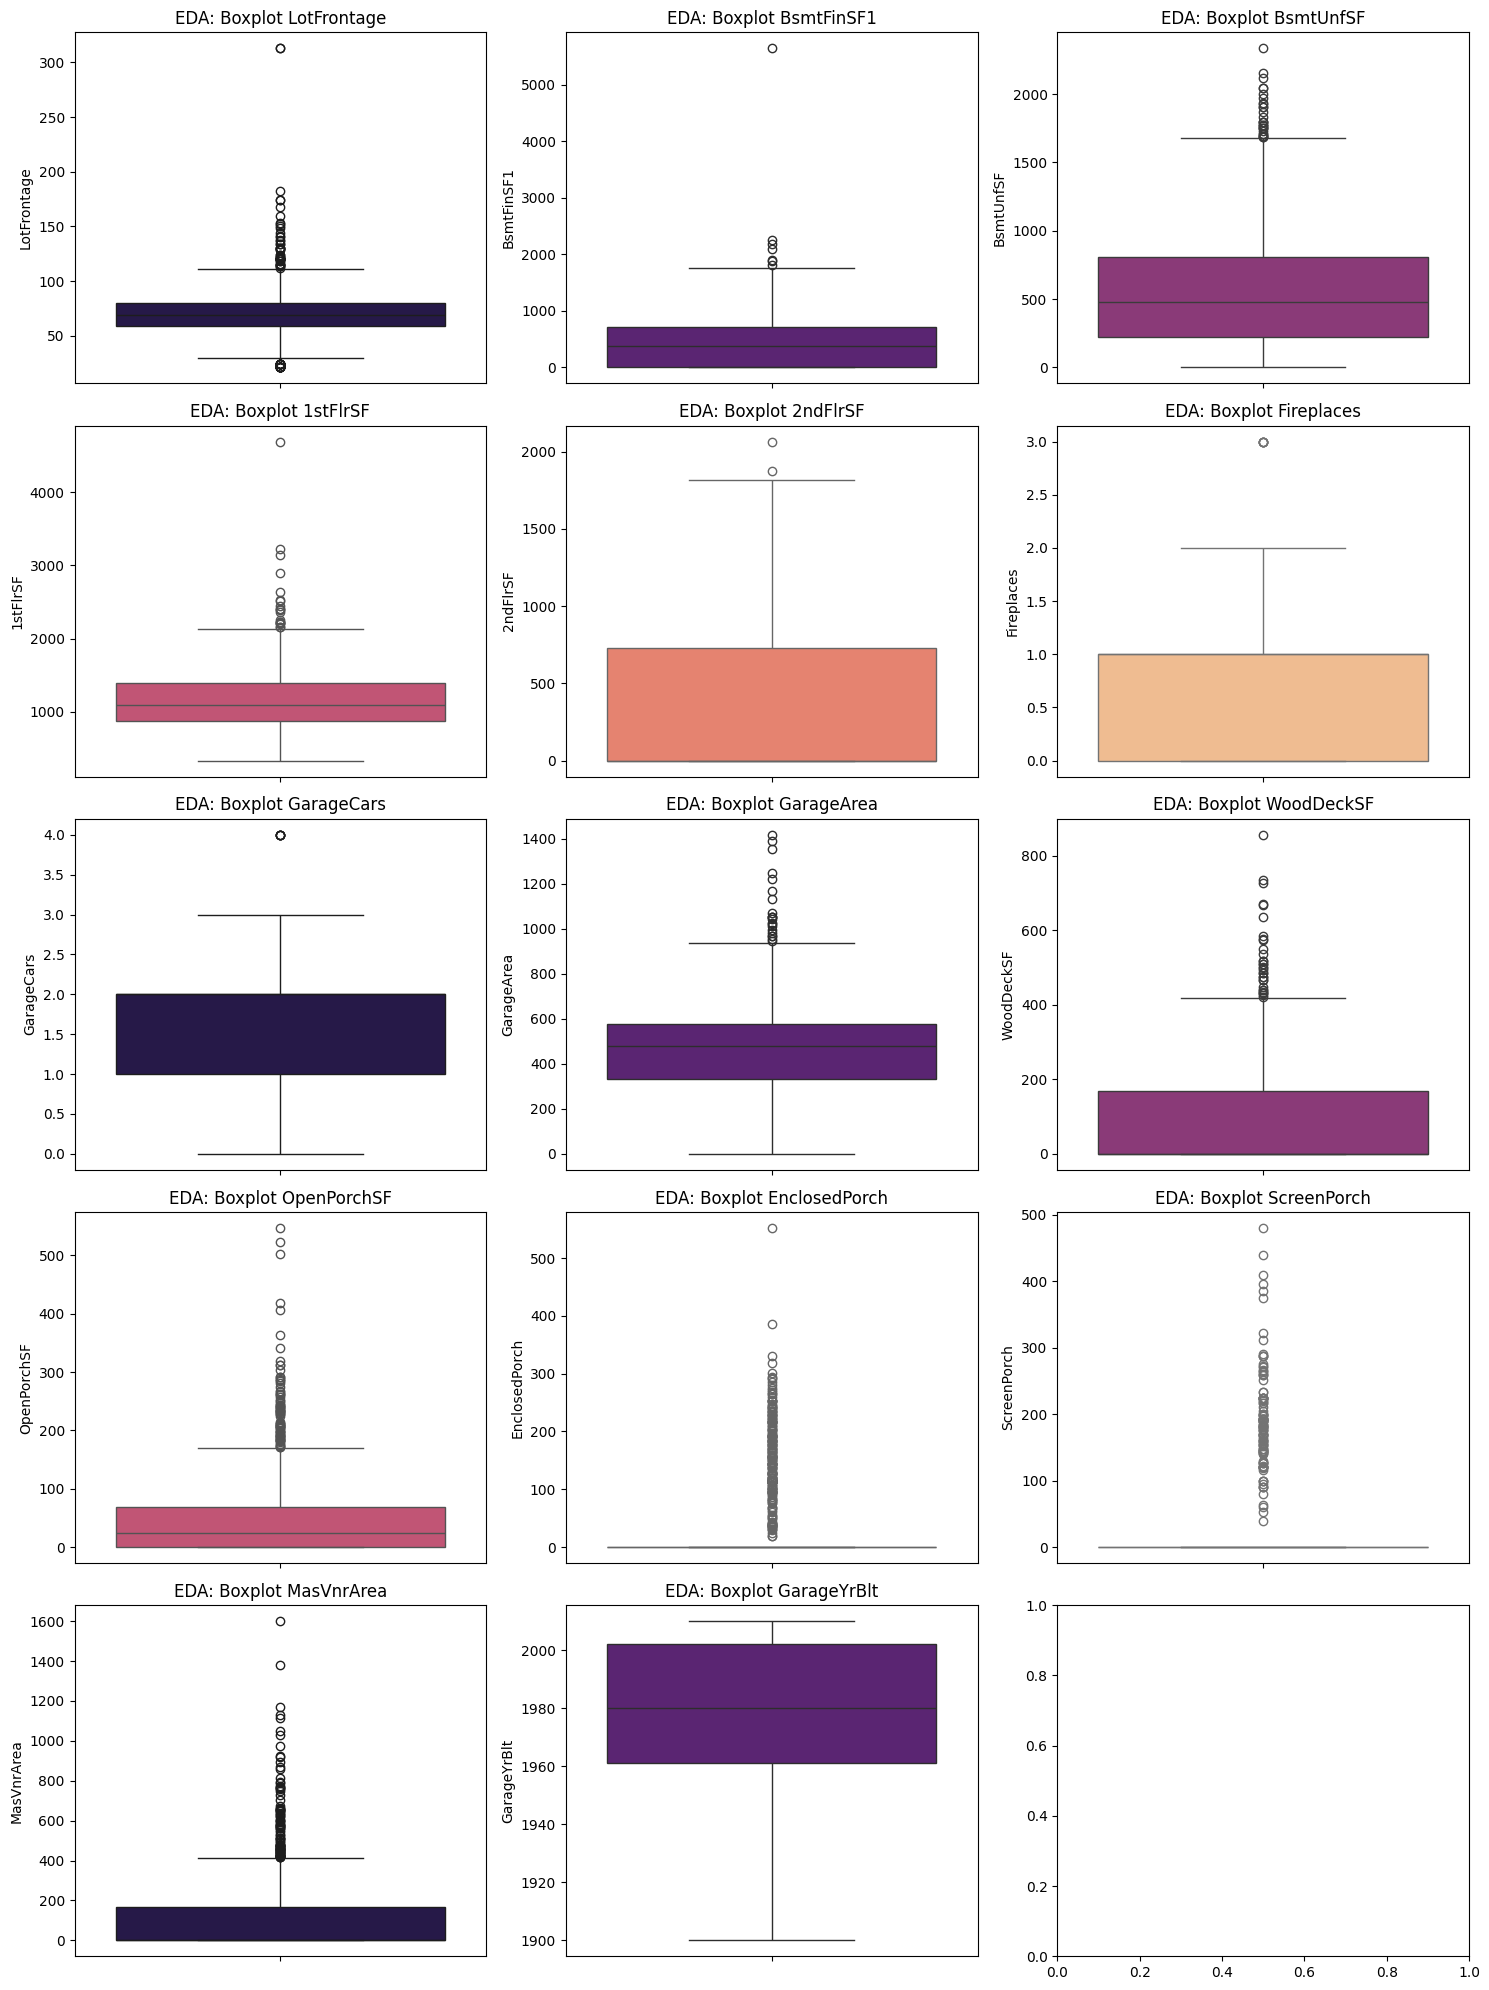

In [ ]:
# EDA: Visualisasi distribusi dan outlier untuk kolom tambahan
cols_additional = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'Fireplaces', 'GarageCars', 'GarageArea',
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea', 'GarageYrBlt']
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
for i, col in enumerate(cols_additional):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3], color=sns.color_palette('magma')[i % len(sns.color_palette('magma'))])
    axes[i//3, i%3].set_title(f'EDA: Distribusi {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
for i, col in enumerate(cols_additional):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3], color=sns.color_palette('magma')[i % len(sns.color_palette('magma'))])
    axes[i//3, i%3].set_title(f'EDA: Boxplot {col}')
plt.tight_layout()
plt.show()

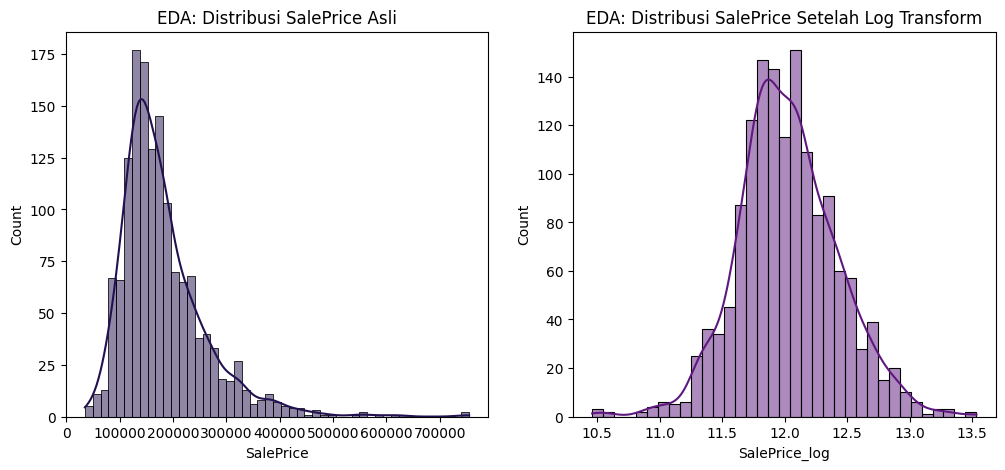

In [ ]:
# EDA: Transformasi log untuk SalePrice dan visualisasi
df['SalePrice_log'] = np.log1p(df['SalePrice'])  # log(1 + x) untuk menghindari log(0)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['SalePrice'], kde=True, ax=axes[0], color=sns.color_palette('magma')[0])
axes[0].set_title('EDA: Distribusi SalePrice Asli')
sns.histplot(df['SalePrice_log'], kde=True, ax=axes[1], color=sns.color_palette('magma')[1])
axes[1].set_title('EDA: Distribusi SalePrice Setelah Log Transform')
plt.show()

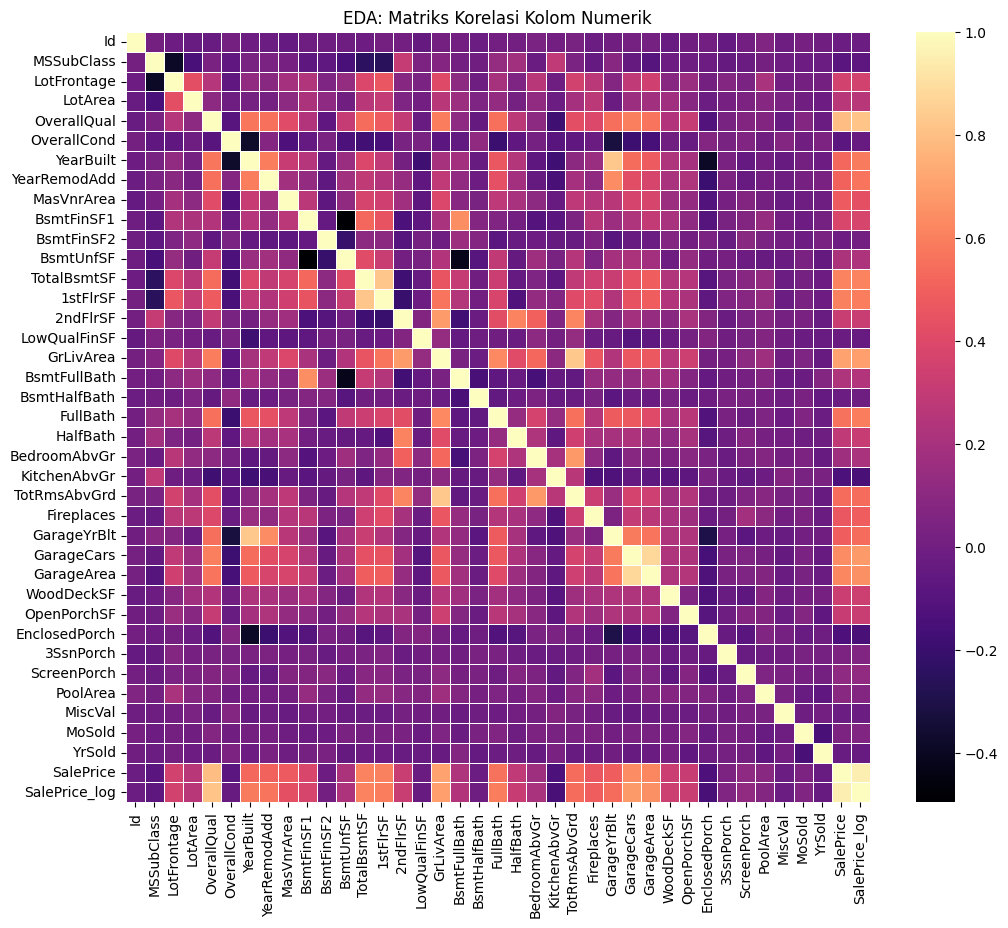

In [ ]:
# EDA: Korelasi antar kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='magma', linewidths=0.5)
plt.title('EDA: Matriks Korelasi Kolom Numerik')
plt.show()

In [ ]:
print("Korelasi dengan SalePrice:\n", corr_with_saleprice.head(100))

Korelasi dengan SalePrice:
 SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPo

In [ ]:
# EDA: Korelasi dengan SalePrice
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nEDA: Korelasi dengan SalePrice (Top 10):")
print(corr_with_saleprice.head(10))
print("\nEDA: Korelasi dengan SalePrice (Semua):")
print(corr_with_saleprice.head(100))  # Sesuai kode asli, tampilkan semua untuk referensi


EDA: Korelasi dengan SalePrice (Top 10):
SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64

EDA: Korelasi dengan SalePrice (Semua):
SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
B

In [ ]:
# # Import tambahan untuk analisis kategorikal
# from scipy.stats import f_oneway, chi2_contingency
# import itertools

In [ ]:
# # Pilih kolom kategorikal (sebelum encoding)
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# print(f"Kolom Kategorikal: {categorical_cols}")

In [ ]:
# # 1. Korelasi Kategorikal vs SalePrice (ANOVA - untuk melihat perbedaan mean)
# anova_results = {}
# for col in categorical_cols:
#     if col in df.columns and df[col].nunique() > 1:  # Pastikan ada variasi
#         unique_vals = df[col].dropna().unique()  # Exclude NaN
#         groups = [df[df[col] == cat]['SalePrice'] for cat in unique_vals if df[col].value_counts()[cat] > 1]
#         if len(groups) > 1:
#             f_stat, p_val = f_oneway(*groups)
#             anova_results[col] = {'F-Statistic': f_stat, 'P-Value': p_val}
# anova_df = pd.DataFrame(anova_results).T.sort_values(by='P-Value')
# print("\nANOVA Results (Kategorikal vs SalePrice):")
# print(anova_df.head(100))  # Top 10 berdasarkan P-Value (rendah = signifikan)


In [ ]:
# # Visualisasi boxplot untuk top 3 fitur signifikan (jika ada)
# top_cat = anova_df.head(3).index.tolist()
# if top_cat:
#     fig, axes = plt.subplots(1, len(top_cat), figsize=(15, 5))
#     for i, col in enumerate(top_cat):
#         sns.boxplot(x=df[col], y=df['SalePrice'], ax=axes[i], hue=df[col], palette='magma', legend=False)
#         axes[i].set_title(f'Boxplot {col} vs SalePrice')
#         axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels 90 degrees
#     plt.tight_layout()
#     plt.show()


In [ ]:
# # 2. Korelasi Kategorikal vs Kategorikal (Chi-Square Test)
# chi2_results = {}
# for col1, col2 in itertools.combinations(categorical_cols, 2):
#     if col1 in df.columns and col2 in df.columns:
#         contingency_table = pd.crosstab(df[col1], df[col2])
#         if contingency_table.size > 0 and contingency_table.sum().sum() > 0:  # Pastikan tidak kosong
#             chi2, p, dof, expected = chi2_contingency(contingency_table)
#             chi2_results[f'{col1} vs {col2}'] = {'Chi2': chi2, 'P-Value': p}
# chi2_df = pd.DataFrame(chi2_results).T.sort_values(by='P-Value')
# print("\nChi-Square Results (Kategorikal vs Kategorikal):")
# print(chi2_df.head(100))  # Top 10 berdasarkan P-Value

In [ ]:
# # Drop fitur kategorikal dengan P-Value > 0.05 (tidak signifikan) jika diinginkan
# non_significant_cat = anova_df[anova_df['P-Value'] > 0.05].index.tolist()
# print(f"\nFitur Kategorikal Tidak Signifikan (P > 0.05): {non_significant_cat}")
# # Uncomment untuk drop: df.drop(columns=non_significant_cat, inplace=True, errors='ignore')


In [ ]:
# === PREPROCESSING ===
# Preprocessing: Penanganan Missing Values
print("\n=== Preprocessing: Handling Missing Values ===")
# Imputasi simbolik (NA -> 'None')
categorical_na_to_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                          'FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                          'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                          'GarageFinish', 'GarageQual', 'GarageCond',
                          'MasVnrType']
df[categorical_na_to_none] = df[categorical_na_to_none].fillna('None')



=== Preprocessing: Handling Missing Values ===


In [ ]:
# Imputasi numerik 0 (NA -> 0)
numeric_na_to_zero = ['GarageArea', 'TotalBsmtSF', 'BsmtFullBath',
                      'MasVnrArea', 'GarageYrBlt']
df[numeric_na_to_zero] = df[numeric_na_to_zero].fillna(0)

In [ ]:
# Imputasi Statistik
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [ ]:
# Preprocessing: Feature Engineering
print("\nPreprocessing: Feature Engineering")
df['Age'] = df['YrSold'] - df['YearBuilt']
df['AgeRemod'] = df['YrSold'] - df['YearRemodAdd']
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['RoomsRatio'] = df['TotRmsAbvGrd'] / (df['GrLivArea'] + 1)  # Hindari division by zero
df['BathBedRatio'] = df['TotalBath'] / (df['BedroomAbvGr'] + 1)  # Hindari division by zero


Preprocessing: Feature Engineering


In [ ]:
# Hapus kolom yang sudah tidak digunakan
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'TotalBsmtSF',
                'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                'TotRmsAbvGrd', 'BedroomAbvGr']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
# # Encoding
# # Label Encoding untuk ordinal
# label_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#               'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'GarageQual', 'GarageCond',
#               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'LotShape', 'PavedDrive']
# le = LabelEncoder()
# for col in label_cols:
#     if col in df.columns:
#         df[col] = le.fit_transform(df[col].astype(str))  # Pastikan string untuk konsistensi


In [ ]:
# Preprocessing: Drop kolom dengan nilai nol >50%
numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_to_drop_zero = []
for col in numeric_cols:
    zero_percentage = (df[col] == 0).sum() / len(df) * 100
    if zero_percentage > 50:
        cols_to_drop_zero.append(col)
print(f"\nPreprocessing: Kolom dengan nol >50%: {cols_to_drop_zero}")
df.drop(columns=cols_to_drop_zero, inplace=True, errors='ignore')
print(f"Shape setelah drop nol tinggi: {df.shape}")


Preprocessing: Kolom dengan nol >50%: ['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Shape setelah drop nol tinggi: (1460, 68)


In [ ]:
# === PREPROCESSING: Pembobotan dan Encoding Kolom Kategorikal (Ordinal) ===
# Mapping berdasarkan deskripsi (ordinal, assign nilai dari rendah ke tinggi)
mappings = {
    'MSSubClass': {
        20: 1, 30: 2, 40: 3, 45: 4, 50: 5, 60: 6, 70: 7, 75: 8, 80: 9, 85: 10,
        90: 11, 120: 12, 150: 13, 160: 14, 180: 15, 190: 16  # Urutan berdasarkan kompleksitas/usia
    },
    'MSZoning': {
        'A': 1, 'C': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8  # Urutan berdasarkan density/akses
    },
    'Street': {'Grvl': 1, 'Pave': 2},  # Gravel < Paved
    'Alley': {'Grvl': 1, 'Pave': 2, 'None': 0},  # None = 0, Gravel < Paved
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},  # Regular < Irregular
    'LandContour': {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},  # Level < Banked/Hillside/Low
    'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},  # Electricity only < All public
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5},  # Inside < Corner < Cul-de-sac < Frontage
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},  # Gentle < Moderate < Severe
    'Condition1': {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},  # Normal < Arterial/Feeder < Railroad < Positive
    'Condition2': {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},  # Sama seperti Condition1
    'BldgType': {'1Fam': 1, '2FmCon': 2, 'Duplx': 3, 'TwnhsE': 4, 'TwnhsI': 5},  # Single-family < Conversion/Duplex < Townhouse
    'HouseStyle': {'1Story': 1, '1.5Unf': 2, '1.5Fin': 3, '2Story': 4, '2.5Unf': 5, '2.5Fin': 6, 'SFoyer': 7, 'SLvl': 8},  # Urutan berdasarkan story/finish
    'RoofStyle': {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6},  # Flat < Gable < Complex
    'RoofMatl': {'Roll': 1, 'Tar&Grv': 2, 'WdShake': 3, 'WdShngl': 4, 'CompShg': 5, 'Membran': 6, 'Metal': 7, 'ClyTile': 8},  # Roll < Tar < Wood < Composite < Premium
    'MasVnrType': {'None': 0, 'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3, 'Stone': 4},  # None < Brick < Stone
    'Foundation': {'Wood': 1, 'Slab': 2, 'BrkTil': 3, 'CBlock': 4, 'Stone': 5, 'PConc': 6},  # Wood < Slab < Brick < Concrete
    'Heating': {'Wall': 1, 'Grav': 2, 'Floor': 3, 'OthW': 4, 'GasW': 5, 'GasA': 6},  # Wall < Gravity < Gas
    'CentralAir': {'N': 0, 'Y': 1},  # No < Yes
    'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},  # Mixed < Fuse < Standard
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},  # Salvage < Severe < Typical
    'GarageType': {'None': 0, 'CarPort': 1, 'Detchd': 2, 'Attchd': 3, 'Basment': 4, 'BuiltIn': 5, '2Types': 6},  # None < Detached < Attached < Built-in
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},  # None < Unfinished < Rough < Finished
    'PavedDrive': {'N': 1, 'P': 2, 'Y': 3},  # Dirt < Partial < Paved
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},  # None < Minimum Wood < Good Wood < Privacy
    'MiscFeature': {'None': 0, 'Othr': 1, 'Shed': 2, 'Gar2': 3, 'Elev': 4, 'TenC': 5},  # None < Other < Shed < Garage < Elevator < Tennis
    'SaleType': {'Oth': 1, 'ConLD': 2, 'ConLI': 3, 'ConLw': 4, 'Con': 5, 'COD': 6, 'WD': 7, 'CWD': 8, 'VWD': 9, 'New': 10},  # Other < Contract < Warranty < New
    'SaleCondition': {'Partial': 1, 'Alloca': 2, 'AdjLand': 3, 'Abnorml': 4, 'Family': 5, 'Normal': 6},  # Partial < Abnormal < Normal
    # Kolom ordinal lainnya (sudah ada di kode asli, tapi pastikan mapping)
    'OverallQual': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},  # Sudah ordinal
    'OverallCond': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},  # Sudah ordinal
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # Poor < Excellent
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # Poor < Excellent
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # None < Poor < Excellent
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # None < Poor < Excellent
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # Poor < Excellent
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # Poor < Excellent
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # None < Poor < Excellent
    'PoolQC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},  # None < Fair < Excellent
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # None < Poor < Excellent
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},  # None < Poor < Excellent
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},  # None < No < Good
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},  # None < Unfinished < Good
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},  # Sama seperti FinType1
}

In [ ]:

# Preprocessing: Kolom yang sudah di-mapping (encode ordinal)
encoded_cols = []
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(0)  # Map, fill NaN dengan 0 jika tidak ada mapping
        encoded_cols.append(col)

print(f"Kolom yang di-encode ordinal: {encoded_cols}")


Kolom yang di-encode ordinal: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']


In [ ]:

# Preprocessing: One-Hot Encoding untuk kolom spesifik ('Neighborhood', 'Exterior1st', 'Exterior2nd')
# Kolom ini adalah nominal, jadi gunakan one-hot encoding
ohe_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)  # drop_first untuk menghindari multicollinearity
print(f"One-hot encoded kolom: {ohe_cols}")

One-hot encoded kolom: ['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [ ]:

# Preprocessing: Skip kolom belum ada pembobotan (tetap sebagai string atau drop jika tidak perlu)
remaining_cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom kategorikal tersisa (skip encoding): {remaining_cat_cols}")
# Jika ingin drop, uncomment: df.drop(columns=remaining_cat_cols, inplace=True, errors='ignore')


Kolom kategorikal tersisa (skip encoding): []


In [ ]:
# Preprocessing: Verifikasi akhir
print(f"Shape akhir setelah refine: {df.shape}")
print("Missing values akhir:", df.isnull().sum().sum())


Shape akhir setelah refine: (1460, 118)
Missing values akhir: 0


In [ ]:
# Preprocessing: Hapus kolom ID jika ada
if 'Id' in df.columns:
    df.drop(['Id'], axis=1, inplace=True)

In [ ]:
# Preprocessing: Simpan ulang
path = '/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/'
try:
    with open(path + 'preprocessed_data_refined.pkl', 'wb') as f:
        pickle.dump(df, f)
    df.to_csv(path + 'preprocessed_data_refined.csv', index=False)
    print("Dataset refined disimpan.")
except Exception as e:
    print(f"Error menyimpan: {e}")

Dataset refined disimpan.


In [ ]:
# Preprocessing: Hapus kolom ID jika ada
if 'Id' in df.columns:
    df.drop(['Id'], axis=1, inplace=True)


In [ ]:
# Preprocessing: Verifikasi missing values setelah preprocessing
print("Missing Values Setelah Preprocessing:")
print(df.isnull().sum().sum())  # Harus 0

Missing Values Setelah Preprocessing:
0


In [ ]:
# Preprocessing: Hapus fitur dengan korelasi absolut < 0.1 terhadap SalePrice (untuk mengurangi noise)
low_corr_features = corr_with_saleprice[abs(corr_with_saleprice) < 0.1].index.tolist()
print(f"Fitur dengan korelasi absolut < 0.1: {low_corr_features}")
# Hapus jika diinginkan (uncomment baris berikut)
df.drop(columns=low_corr_features, inplace=True, errors='ignore')
print("Fitur rendah dihapus. Shape baru:", df.shape)


Fitur dengan korelasi absolut < 0.1: ['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass']
Fitur rendah dihapus. Shape baru: (1460, 113)


In [ ]:
# Preprocessing: Hitung VIF untuk deteksi multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
numeric_cols_vif = df.select_dtypes(include=[np.number]).columns.tolist()
# Kecualikan target dari VIF
if 'SalePrice' in numeric_cols_vif:
    numeric_cols_vif.remove('SalePrice')
if 'SalePrice_log' in numeric_cols_vif:
    numeric_cols_vif.remove('SalePrice_log')
X_vif = df[numeric_cols_vif]
X_vif = add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF Results:")
print(vif_data.sort_values(by='VIF', ascending=False))
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
print(f"Fitur dengan VIF > 10: {high_vif_features}")



VIF Results:
          Feature          VIF
0           const  8863.914483
45     GarageCond    17.180818
44     GarageQual    15.927354
40    GarageYrBlt    14.596142
55        TotalSF    12.850391
26     BsmtFinSF1     9.704470
28      BsmtUnfSF     8.131397
42     GarageCars     6.416704
33       1stFlrSF     5.946902
43     GarageArea     5.660426
38    FireplaceQu     4.950875
37     Fireplaces     4.824071
53            Age     4.750756
56      TotalBath     4.701379
22       BsmtQual     4.466397
15    OverallQual     3.944080
58   BathBedRatio     3.459655
19      ExterQual     3.289707
39     GarageType     2.834956
35    KitchenQual     2.723648
23       BsmtCond     2.689206
25   BsmtFinType1     2.638942
21     Foundation     2.605674
41   GarageFinish     2.555024
54       AgeRemod     2.517952
57     RoomsRatio     2.303261
52  SaleCondition     2.193040
51       SaleType     2.139172
10      LandSlope     1.972750
14     HouseStyle     1.876942
30      HeatingQC     1.7

In [ ]:
# Drop fitur dengan VIF > 10
df.drop(columns=high_vif_features, inplace=True, errors='ignore')
print(f"Shape setelah drop VIF tinggi: {df.shape}")
print("Preprocessing selesai. Shape akhir:", df.shape)


Shape setelah drop VIF tinggi: (1460, 109)
Preprocessing selesai. Shape akhir: (1460, 109)


In [ ]:
# Simpan
path = '/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/'
try:
    with open(path + 'preprocessed_data.pkl', 'wb') as f:
        pickle.dump(df, f)
    df.to_csv(path + 'preprocessed_data.csv', index=False)
    print("Dataset disimpan.")
except Exception as e:
    print(f"Error menyimpan: {e}")

Dataset disimpan.


In [ ]:
# Kode Load
print("\n=== Kode Load ===")
print("import pickle")
print("with open('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.pkl', 'rb') as f:")
print("    df_loaded = pickle.load(f)")



=== Kode Load ===
import pickle
with open('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.pkl', 'rb') as f:
    df_loaded = pickle.load(f)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.csv')
df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,6.0,65.0,8450,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
1,6.0,80.0,9600,2,0,1,1,4,4,1,...,False,False,True,False,False,False,False,False,False,False
2,6.0,68.0,11250,2,0,2,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
3,6.0,60.0,9550,2,0,2,1,4,2,1,...,False,False,False,False,False,False,False,False,False,True
4,6.0,84.0,14260,2,0,2,1,4,4,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,62.0,7917,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
1456,6.0,85.0,13175,2,0,1,1,4,1,1,...,False,False,False,False,True,False,False,False,False,False
1457,6.0,66.0,9042,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1458,6.0,68.0,9717,2,0,1,1,4,1,1,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# # Preprocessing: Verifikasi missing values setelah preprocessing
# print("Missing Values Setelah Preprocessing:")
# print(df.isnull().sum().sum())  # Harus 0

In [ ]:
# # Preprocessing: Hapus fitur dengan korelasi absolut < 0.1 terhadap SalePrice (untuk mengurangi noise)
# low_corr_features = corr_with_saleprice[abs(corr_with_saleprice) < 0.1].index.tolist()
# print(f"Fitur dengan korelasi absolut < 0.1: {low_corr_features}")

In [ ]:
# # Hapus jika diinginkan (uncomment baris berikut)
# df.drop(columns=low_corr_features, inplace=True, errors='ignore')
# print("Fitur rendah dihapus. Shape baru:", df.shape)

# print("Preprocessing selesai. Shape akhir:", df.shape)

In [ ]:
# # Simpan
# path = '/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/'
# try:
#     with open(path + 'preprocessed_data.pkl', 'wb') as f:
#         pickle.dump(df, f)
#     df.to_csv(path + 'preprocessed_data.csv', index=False)
#     print("Dataset disimpan.")
# except Exception as e:
#     print(f"Error menyimpan: {e}")

# # Kode Load
# print("\n=== Kode Load ===")
# print("import pickle")
# print("with open('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.pkl', 'rb') as f:")
# print("    df_loaded = pickle.load(f)")

# df = pd.read_csv('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.csv')

# df

In [ ]:
# # 4. Skip kolom belum ada pembobotan (tetap sebagai string atau drop jika tidak perlu)
# remaining_cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# print(f"Kolom kategorikal tersisa (skip encoding): {remaining_cat_cols}")
# # Jika ingin drop, uncomment: df.drop(columns=remaining_cat_cols, inplace=True, errors='ignore')

# # Verifikasi akhir
# print(f"Shape akhir setelah refine: {df.shape}")
# print("Missing values akhir:", df.isnull().sum().sum())

# # Simpan ulang
# path = '/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/'
# try:
#     with open(path + 'preprocessed_data_refined.pkl', 'wb') as f:
#         pickle.dump(df, f)
#     df.to_csv(path + 'preprocessed_data_refined.csv', index=False)
#     print("Dataset refined disimpan.")
# except Exception as e:
#     print(f"Error menyimpan: {e}")

In [ ]:
# # One-Hot Encoding untuk nominal
# ohe_cols = ['Neighborhood', 'MSZoning', 'MSSubClass', 'BldgType', 'HouseStyle', 'SaleCondition', 'Foundation']
# df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)


In [ ]:
# # Encode semua kolom kategorikal tersisa (untuk menghindari string di X)
# remaining_cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# print(f"\nKolom kategorikal tersisa sebelum encoding: {remaining_cat_cols}")
# if remaining_cat_cols:
#     df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)
#     print(f"Encoded kolom: {remaining_cat_cols}")

In [ ]:
# # Hapus kolom ID jika ada
# if 'Id' in df.columns:
#     df.drop(['Id'], axis=1, inplace=True)


In [ ]:
# # Verifikasi missing values setelah preprocessing
# print("Missing Values Setelah Preprocessing:")
# print(df.isnull().sum().sum())  # Harus 0


In [ ]:
# # Hapus fitur dengan korelasi absolut < 0.1 terhadap SalePrice (untuk mengurangi noise)
# low_corr_features = corr_with_saleprice[abs(corr_with_saleprice) < 0.1].index.tolist()
# print(f"Fitur dengan korelasi absolut < 0.1: {low_corr_features}")
# # Hapus jika diinginkan (uncomment baris berikut)
# df.drop(columns=low_corr_features, inplace=True, errors='ignore')
# print("Fitur rendah dihapus. Shape baru:", df.shape)


In [ ]:
# print("Preprocessing selesai. Shape akhir:", df.shape)

In [ ]:
# # Simpan
# path = '/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/'
# try:
#     with open(path + 'preprocessed_data.pkl', 'wb') as f:
#         pickle.dump(df, f)
#     df.to_csv(path + 'preprocessed_data.csv', index=False)
#     print("Dataset disimpan.")
# except Exception as e:
#     print(f"Error menyimpan: {e}")

# # Kode Load
# print("\n=== Kode Load ===")
# print("import pickle")
# print("with open('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.pkl', 'rb') as f:")
# print("    df_loaded = pickle.load(f)")

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/project03/Project 3_ House Price Prediction/Dataset/preprocessed_data.csv')

In [ ]:
df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,6.0,65.0,8450,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
1,6.0,80.0,9600,2,0,1,1,4,4,1,...,False,False,True,False,False,False,False,False,False,False
2,6.0,68.0,11250,2,0,2,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
3,6.0,60.0,9550,2,0,2,1,4,2,1,...,False,False,False,False,False,False,False,False,False,True
4,6.0,84.0,14260,2,0,2,1,4,4,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,62.0,7917,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,True,False,False
1456,6.0,85.0,13175,2,0,1,1,4,1,1,...,False,False,False,False,True,False,False,False,False,False
1457,6.0,66.0,9042,2,0,1,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1458,6.0,68.0,9717,2,0,1,1,4,1,1,...,False,False,True,False,False,False,False,False,False,False
